In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
# from towardsdatascience.com and author is Adarsh Menon "Linear Regression in 6 lines of python"-- TDS will be shorthand
from sklearn.linear_model import LinearRegression

In [30]:
path="bees_new_2.csv"
bees_df= pd.read_csv(path)
bees_gb= bees_df.groupby(["State"])["Percent Lost"].mean()
bees_pl_df=pd.DataFrame(bees_gb)
bees_final=bees_pl_df.drop(["Hawaii"])

In [31]:
path_towers="cell_states.csv"
towers_df=pd.read_csv(path_towers)
towers_df_abc=towers_df.sort_values("NAME")
towers_final=towers_df_abc.reset_index()
towers_final_drop=towers_final.drop([6,7,26,27,37])

In [38]:
X = towers_final_drop.iloc[:, 3].values.reshape(-1, 1)  # values converts it into a numpy array
Y = bees_final.iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

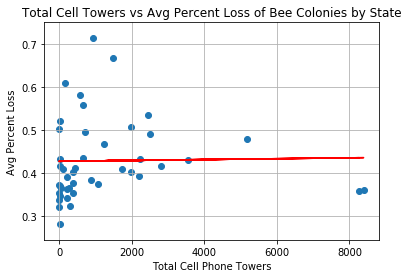

In [46]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel("Total Cell Phone Towers")
plt.ylabel("Avg Percent Loss")
plt.title("Total Cell Towers vs Avg Percent Loss of Bee Colonies by State")
plt.grid()

plt.show()

In [27]:
stats.pearsonr(X, Y)

(array([0.02086856]), array([0.89304211]))